Story Data Exploration

In [2]:
#Import required libraries
import matplotlib.pyplot as plt 
import pandas as pd  
import numpy as np
import seaborn as  sns

In [3]:
#Load the merged file
storycontentdata = pd.read_csv("stories_content.csv")

In [3]:
#View structure of the file
storycontentdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7880 entries, 0 to 7879
Data columns (total 17 columns):
story_id                  7880 non-null int64
story_title               7880 non-null object
story_english_title       6153 non-null object
is_child_created_story    7880 non-null object
stories_status            7880 non-null int64
stories_summary           7880 non-null object
ancestry                  5711 non-null object
is_recommended_story      7880 non-null object
reads                     7880 non-null int64
language_name             7880 non-null object
organization_name         2480 non-null object
page_id                   7880 non-null int64
page_type                 7880 non-null object
story_derivation_type     7880 non-null object
story_publishing_type     7880 non-null object
reading_level_cat         7880 non-null object
story_content             7880 non-null object
dtypes: int64(4), object(13)
memory usage: 1.0+ MB


In [6]:
#View summary statistics for the numeric variables. Variable of interest is #reads.  
storycontentdata.describe()
#Observations: Average number of reads is 119 for stories.#Max is 27K, Min is 0 reads.
#Only data of published stories is present in the corpus <stories_status=1>

,story_id,stories_status,reads,page_id
count,7880.000000,7880.0,7880.000000,7880.000000
mean,15304.335533,1.0,119.452157,185775.415228
std,9354.348996,0.0,571.060705,115306.229819
min,1.000000,1.0,0.000000,4.000000
25%,7754.500000,1.0,9.000000,87421.750000
50%,15606.000000,1.0,24.000000,184249.500000
75%,21249.500000,1.0,69.250000,269677.250000
max,36600.000000,1.0,27003.000000,425178.000000


In [5]:
#View initial rows from the file to get an idea of the content
storycontentdata.head()
#Observations: Stories are in multiple languages. Story category information seems to be missing. 

,story_id,story_title,story_english_title,is_child_created_story,stories_status,stories_summary,ancestry,is_recommended_story,reads,language_name,organization_name,page_id,page_type,story_derivation_type,story_publishing_type,reading_level_cat,story_content
0,1,वह हँस दिया,Veh Hans Diyaa,f,1,क्‍या आपको दौड़ लगाने में मज़ा आता है? हमारी कहा...,NaN,t,668,Hindi,Pratham Books,4,StoryPage,original,Publisher Story,Level 1,हिरण का बच्चा दौड़ रहा था। खरगोश से आगे। हाथी स...
1,2,Smile Please!,Smile Please!,f,1,Follow the young deer as he races along with f...,1,t,13368,English,Pratham Books,16,StoryPage,Translated,Publisher Story,Level 1,A fawn was racing in the forest.He was ahead o...
2,4,ସେ ହସିଦେଲା,Se Hasidela,f,1,ଆପଣଂକୁ ଦୌଡିବାକୁ ମଜାଲାଗେ କି ?\nଏଇ କାହାଣୀର ହରି...,1,t,160,Odia,Pratham Books,44,StoryPage,Translated,Publisher Story,Level 1,ହରିଣ ଛୁଆଟିଏ ଦୌଡୁଥିଲା। ଠେକୁଆଠୁ ଆଗରେ। ହାତୀଠୁ ବି ...
3,5,ਉਹ ਹੱਸ ਪਿਆ,Oh Has Pia,f,1,ਕੀ ਤੁਹਾਨੂੰ ਦੋੜ ਲਗਾਉਣ ਵਿਚ ਮਜ਼ਾ ਆਉਂਦਾ ਹੈ ? ਸਾਡੀ ਕ...,1,t,43,Punjabi,Pratham Books,58,StoryPage,Translated,Publisher Story,Level 1,ਹਿਰਣ ਦਾ ਬੱਚਾ ਦਂੜ ਰਿਹਾ ਸੀ। ਖਰਗੋਸ਼ ਤੋ ਅੱਗੇ। ਹਾਥੀ...
4,6,একটুখানি হাসি,Ektukhani Hashi,f,1,"হরিন ছানা যখন তার বন্ধুদের সাথে ছুটবে, তখন দেখো।",1,t,87,Bengali,Pratham Books,72,StoryPage,Translated,Publisher Story,Level 1,একটা ছোটো হরিণ ছানা সবার আগে ছুটছিল। সে খরগোশে...


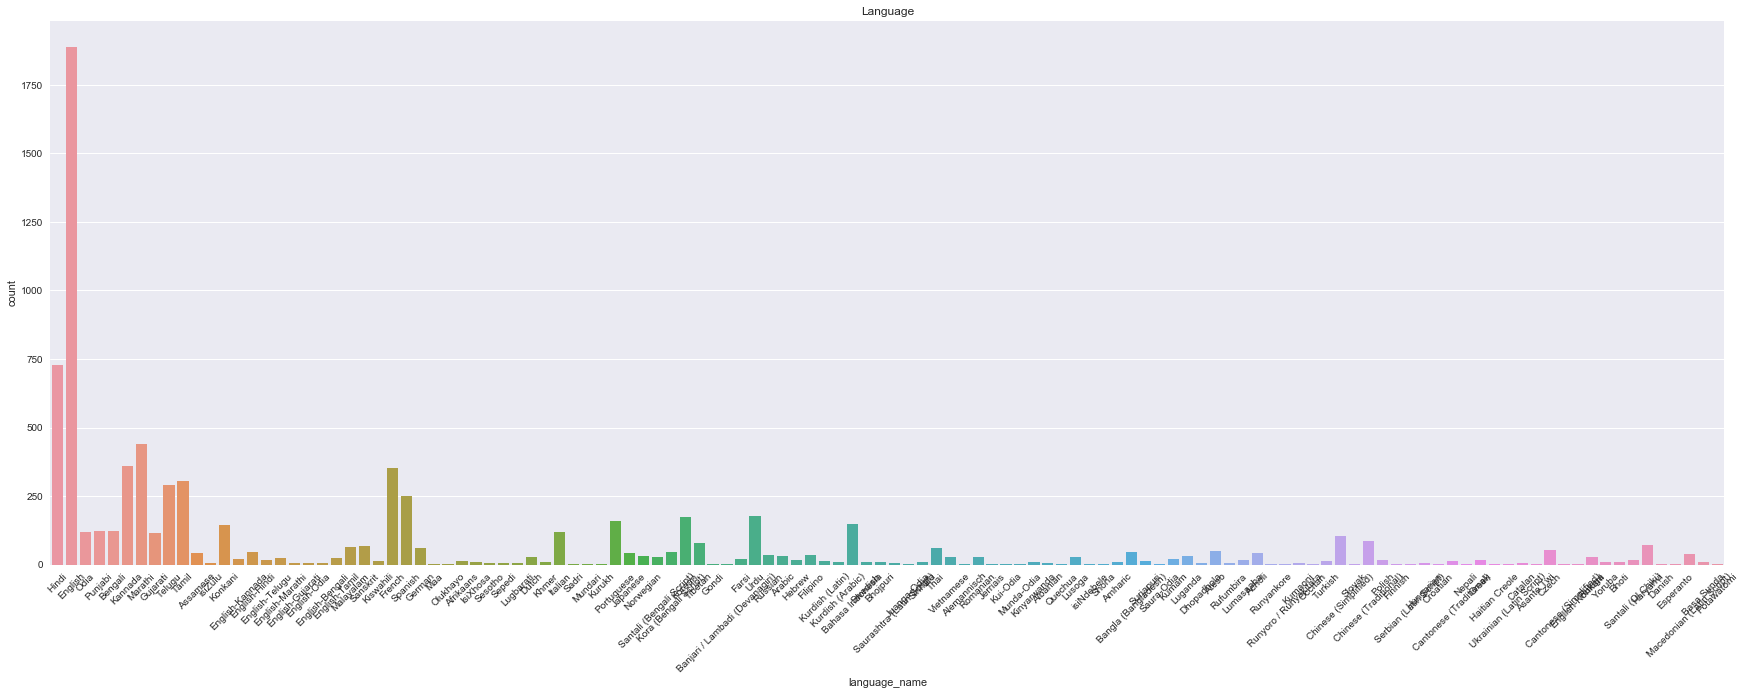

In [10]:
#View the number of stories published in various languages
#<For a count, uncomment below line of code.>
#storycontentdata.language_name.value_counts()
#<For graphical view, use below lines of code.>
plt.figure(figsize = (30,10))

sns.set(style="darkgrid")
# Plot
sns.countplot(x='language_name', data=storycontentdata).set_title('Language')

# Setting labels
plt.xticks(rotation = 45)
plt.show()
#Observation: Most of the stories are in English language and Hindi so would be a good place to start
#analysis and tag generation as we would have sufficient corpus. 

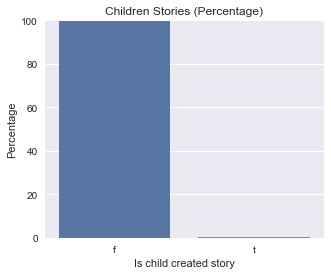

In [21]:
#View the %distribution of stories created by children v/s adults.
plt.figure(figsize = (5,4))

temp = pd.DataFrame(storycontentdata.is_child_created_story.value_counts()/sum(storycontentdata.is_child_created_story.value_counts())*100)
fig = sns.barplot(temp.index,temp.is_child_created_story)
fig.set_title('Children Stories (Percentage)')
fig.set_xlabel('Is child created story')
fig.set_ylabel('Percentage')
#Setting y limits
plt.ylim([0,100])
#plt.xlabel='Is child created story'
#plt.ylabel='Percentage'

plt.show()

#Observation: A very few stories are child created. While on the portal, there are many 
#child created stories. Needs to be checked if we are missing these.

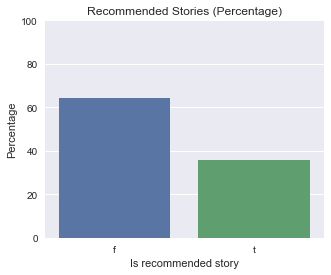

In [22]:
#View the % distribution of stories which have been recommended. 

plt.figure(figsize = (5,4))

temp = pd.DataFrame(storycontentdata.is_recommended_story.value_counts()/sum(storycontentdata.is_recommended_story.value_counts())*100)
fig = sns.barplot(temp.index,temp.is_recommended_story)
fig.set_title('Recommended Stories (Percentage)')
fig.set_xlabel('Is recommended story')
fig.set_ylabel('Percentage')
#Setting y limits
plt.ylim([0,100])
plt.show()
#Observation: There are a significant number of stories which are recommended to others for reading. 

# To get numeric count in place of % distribution, uncomment below lines of code
# plt.figure(figsize = (5,10))

# sns.set(style="darkgrid")
# # Plot
# sns.countplot(x='is_recommended_story', data=storycontentdata).set_title('Recommended Stories')
# # Setting labels
# plt.show()

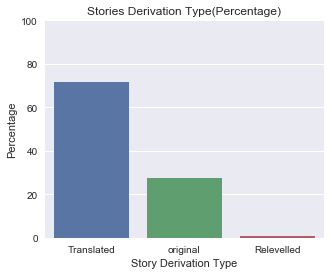

In [23]:
#View the story derivation type distribution to see what % of stories are original v/s translated.
plt.figure(figsize = (5,4))

temp = pd.DataFrame(storycontentdata.story_derivation_type.value_counts()/sum(storycontentdata.story_derivation_type.value_counts())*100)
fig = sns.barplot(temp.index,temp.story_derivation_type)
fig.set_title('Stories Derivation Type(Percentage)')
fig.set_xlabel('Story Derivation Type')
fig.set_ylabel('Percentage')

#Setting y limits
plt.ylim([0,100])
plt.show()
#Observation: A large number of stories are translated. It may be worthwhile exploring how tagging 
#original v/s translated stories works. Are tags of translated stories similar to those in original?
#Perhaps we can generate tags for original stories and then use them for translated ones in 
#respective languages? 

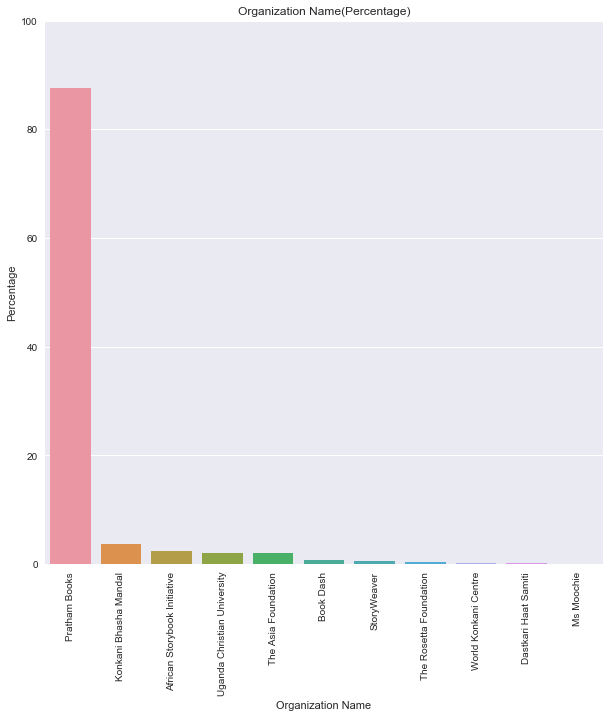

In [24]:
#View distribution of organization name to check which other publishers are involved
plt.figure(figsize = (10,10))

temp = pd.DataFrame(storycontentdata.organization_name.value_counts()/sum(storycontentdata.organization_name.value_counts())*100)
fig = sns.barplot(temp.index,temp.organization_name)
fig.set_title('Organization Name(Percentage)')
fig.set_xlabel('Organization Name')
fig.set_ylabel('Percentage')

plt.xticks(rotation=90)
#Setting y limits
plt.ylim([0,100])
plt.show()
#Observation: There are nearly 11 publisher organizations. However, a large % of the stories 
#on the website are those from Pratham books.

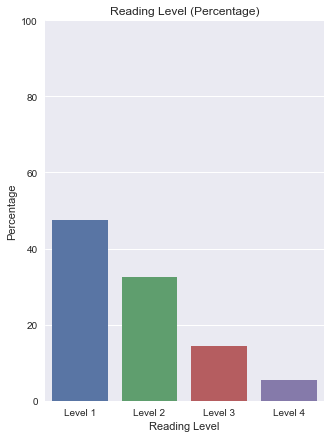

In [25]:
#View how many reading levels are present in the data and distribution of stories amongst those.
plt.figure(figsize = (5,7))

temp = pd.DataFrame(storycontentdata.reading_level_cat.value_counts()/sum(storycontentdata.reading_level_cat.value_counts())*100)
fig = sns.barplot(temp.index,temp.reading_level_cat)
fig.set_title('Reading Level (Percentage)')
fig.set_xlabel('Reading Level')
fig.set_ylabel('Percentage')

#Setting y limits
plt.ylim([0,100])
plt.show()
#Observation: Close to 50% of the stories are of reading level 1. 

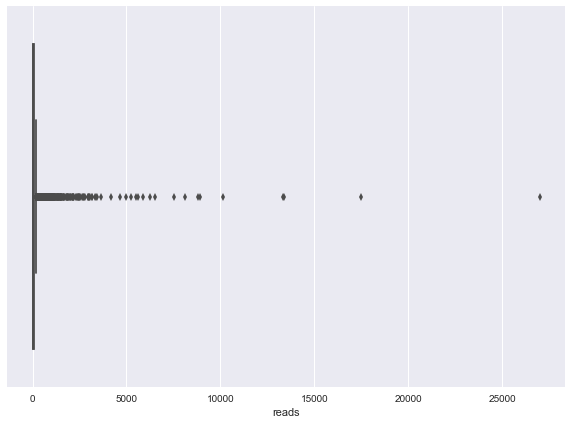

In [37]:
#View the number of reads for the stories to get an idea of readership of the books. 
#Besides being best books, perhaps these highly read books may be well tagged and hence
#easier to find than others 
plt.figure(figsize = (10,7))
sns.boxplot(storycontentdata.reads)
#Observation: Several books have not even been read once. Several have been read about 2-3K times. 
#Some books enjoy very high readership.